두 과제 모두 진행하셔야 합니다.

# 과제 1.

딥러닝 이론 세션에서 배운 다음 용어중 5개를 골라  
이에 대하여 간단하게 용어 정리를 해주세요.  

- 활성화 함수 (Activation function) : 선형으로는 해결되지 않는 문제를 비선형으로써 해결하기 위해 도입된 함수.
- 손실 함수 (Loss function) : 학습된 모델로써 구한 predict값과 원래의 target값과의 오차를 설명하는 함수.
- 경사 하강법 (Gradient descent) : optimal loss를 찾기 위한 방법으로 weight에 따른 loss의 변화량(경사, gradient)을 구하여 가장 낮은 loss를 찾는 방법. 눈을 가린 사람이 산에서 내려갈 때 조금씩 발을 내딛으며 조금씩 더 낮은 곳으로 가는 것으로 비유할 수 있다.
- 학습률 (Learning rate) : 산에서 발을 내딛으며 낮은 곳으로 갈 때, 얼마나 큰 보폭으로 한 걸음씩 내딛을 것인가. 경사하강법에서 gradient를 얼마나 반영할 것인가를 의미함. 학습률이 크면 발산할 수 있고, 작으면 optimal loss로 수렴하는데 오래 걸리거나, local optimal에 정체할 수 있음.
- 에포크 (Epoch) : 전체 dataset 모두 사용하여 학습을 한 번 하면 epoch 1번.
- 오차역전파 (Backpropagation) : output layer에서 여러 층의 hidden layer를 거꾸로 거쳐가며 gradient descent를 하며 parameter update한다.
- Local gradient : 기존의 수식을 통해 구할 수 있는 gradient
- Global gradient : 뒤에서 앞으로 넘어오는 gradient
- Gradient vanishing : 여러 층의 layer를 넘어오며 back propagation을 진행할 때 너무 많은 층을 거치며 gradient가 소실되는 현상
- Optimizer : 최적의 성능, 최소의 cost로 훌륭한 결과를 찾기 위한 성능을 개선하기 위한 것

# 과제 2. Fashion MNIST 분류 딥러닝 구축

## Fashion MNIST 소개 및 개요


Fashon MNIST 데이터셋은 옷, 신발 등의 의류 이미지를  
0~9 의 클래스로 분류한 데이터입니다.  
하단 코드는 데이터에 대해 살펴보는 코드인데,  
데이터가 어떤 식으로 구성되어있는지 참고만 하시면 됩니다.

In [1]:
# torchvision은 이미지 처리 등 비전 태스크를 위한 torch 모듈입니다.
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 이미지를 텐서로 변경
transform = transforms.Compose([
    transforms.ToTensor()
])

In [3]:
# 데이터셋 자동 다운로드
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./.data/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./.data/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST\raw



In [23]:
# 여기 있는 DataLoader는 단순히 EDA를 위해 생성한 것입니다.
batch_size = 16

train_loader = DataLoader(
    dataset     = trainset,
    batch_size  = batch_size
)
test_loader = DataLoader(
    dataset     = testset,
    batch_size  = batch_size
)

In [24]:
# 반복문에서 사용할 수 있도록 iter()함수 적용
dataiter = iter(train_loader)
# next()함수로 다음 배치 1개 갖고오기
images, labels = next(dataiter)

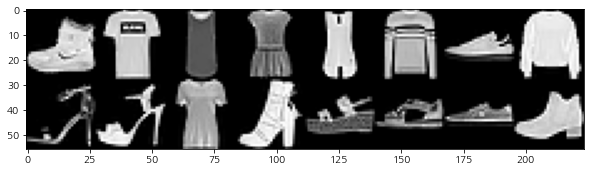

In [25]:
# 데이터 체크
# utils.make_grid : 여러 이미지를 하나로 묶어보기 위함
img = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [26]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [27]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


(28, 28)


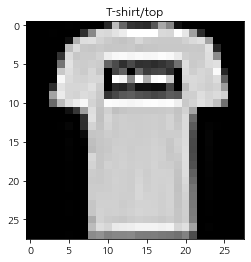

In [28]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

## 과제 진행 부분

여기서부터는 위의 Fashion MNIST 데이터셋을 활용해  
이들을 분류하는 신경망 모델을 구축합니다.  

주석 란에  
`########## 과제 내용 ############`  
해당 주석이 있는 부분에만 코드를 작성하시면 됩니다.  


### 기본 모듈 임포트

In [29]:
from torchvision import transforms, datasets

In [31]:
############# 모듈 임포트 ##############
# 기본 텐서 연산을 위한 모듈과,
# 신경망 구축, 옵티마이저 관련 모듈을 불러옵니다. (총 3개)
import torch
import torch.nn as nn
import torch.optim as optim

### 데이터셋과 DataLoader 생성

입력 `x` 는 `[배치크기, 색, 높이, 넓이]`로 이루어져 있습니다.  
Fashion MNIST에서 이미지의 크기는 28 x 28, 색은 흑백으로 1 가지 입니다.  
그러므로 입력 x의 총 특성값 갯수는 28 x 28 x 1, 즉 784개 입니다. 

In [81]:
# 이미지를 텐서로 변경
transform = transforms.Compose([
    transforms.ToTensor()
])

In [82]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [83]:
############# 모듈 임포트 ##############
# DataLoader 클래스를 사용하기 위한 모듈을 임포트하세요.
from torch.utils.data import DataLoader

In [84]:
BATCH_SIZE = 512

In [85]:
######## DataLoader 생성 ##########
# train set과 test set 각각에 대하여 DataLoader를 생성합니다.
# shuffle=True 매개변수를 넣어 데이터를 섞어주세요.
train_loader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle = True)

test_loader = DataLoader(testset, batch_size = BATCH_SIZE, shuffle = True)

### 신경망 모델 구축

신경망 클래스 이름은 Net으로 하여 3개의 레이어를 가진 모델을 만드세요.  
노드의 개수와 활성화 함수는 자유입니다.  
출력층 노드의 개수는 10개입니다.  
또한, 출력층에 Softmax 함수를 적용할 필요가 없습니다.

(hint. forward시 첫 번째 레이어를 통과하기 전에 784차원의 텐서로 차원을 변환 해야합니다.)

In [155]:
############### Net 신경망 생성 ##############
class Net(nn.Module):
    def __init__(self, activation = None):
        super(Net, self).__init__()
        
        self.layer1 = nn.Linear(784, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 10)
        if activation == None:
            self.activation = nn.ReLU()
        elif activation == 'LeakyReLU':
            self.activation = nn.LeakyReLU()
        elif activation == 'Sigmoid':
            self.activation = nn.Sigmoid()
            
    def forward(self, x):
        out = self.activation(self.layer1(x.view(-1, 784)))
        out = self.activation(self.layer2(out))
        out = self.layer3(out)
        
        return out

In [156]:
model1 = Net()
model2 = Net('LeakyReLU')
model3 = Net('Sigmoid')

### 학습하기

In [157]:
EPOCHS = 30

모델 학습 과정의 함수를 작성합니다.  
주석으로 지시하는 부분의 코드를 작성해주세요.

In [159]:
def train(model, train_loader, optimizer):
    model.train()

    ######## 배치 당 loss 값을 담을 리스트 생성 #########
    batch_losses = []

    for data, target in train_loader:
        ######### 옵티마이저의 기울기 초기화 ############
        optimizer.zero_grad()

        ######### 모델에서 예측값 산출 ############
        output = model.forward(data)

        ######### loss 계산 ############
        # 정답 데이터와의 Cross Entropy Loss 계산
        # 그리고 이 loss를 배치 당 loss로 보관합니다.
        loss = criterion(output, target)
        batch_losses.append(loss)

        ######### 기울기 계산 ########
        loss.backward()

        ######## 가중치 갱신 ########
        optimizer.step()
    
    ######## 배치 당 평균 loss 계산 ############
    avg_loss = sum(batch_losses) / len(batch_losses)
    
    return avg_loss

모델을 테스트하는 과정의 함수도 생성합니다.  
주석으로 지시하는 부분의 코드를 작성해주세요.  

In [160]:
def evaluate(model, test_loader):
    # 모델을 평가 모드로 전환
    model.eval()

    ######## 배치 당 loss 값을 담을 리스트 생성 #########
    batch_losses = []

    # 실제 모델의 예측이 정답과 맞은 횟수 = correct
    correct = 0

    ####### 평가 과정에서는 기울기를 계산하지 않습니다. #########
    ####### 해당하는 코드를 작성해주세요. ############
    with torch.no_grad(): 
        for data, target in test_loader:
            # 예측값 생성
            output = model(data)

            ######### loss 계산 ############
            # 정답 데이터와의 Cross Entropy Loss 계산
            # 그리고 이 loss를 배치 당 loss로 보관합니다.
            loss = criterion(output, target)
            batch_losses.append(loss)
            
            # Accuracy 계산
            # 가장 큰 값을 가진 클래스가 모델의 예측입니다.
            # 예측 클래스(pred)과 정답 클래스를 비교하여 일치할 경우 correct에 1을 더합니다.
            pred = output.max(1, keepdim=True)[1]

            # eq() 함수는 값이 일치하면 1을, 아니면 0을 출력.
            correct += pred.eq(target.view_as(pred)).sum().item()

    ######## 배치 당 평균 loss 계산 ############
    avg_loss = sum(batch_losses) / len(batch_losses)

    #정확도 계산
    accuracy = 100. * correct / len(test_loader.dataset)

    return avg_loss, accuracy

코드를 실행시켜 학습을 진행합니다.  
다소 시간이 걸릴 수 있습니다.

In [162]:
print('ReLU')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr = 0.01)
for epoch in range(1, EPOCHS + 1):
    train_loss = train(model1, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model1, test_loader)
    
    print('[{}] Train Loss: {:.4f}\tTest Loss: {:.4f}\tAccuracy: {:.2f}%'.format(
          epoch, train_loss, test_loss, test_accuracy))

ReLU
[1] Train Loss: 2.2500	Test Loss: 2.1776	Accuracy: 27.31%
[2] Train Loss: 2.0525	Test Loss: 1.8943	Accuracy: 33.19%
[3] Train Loss: 1.7035	Test Loss: 1.5269	Accuracy: 51.26%
[4] Train Loss: 1.3857	Test Loss: 1.2731	Accuracy: 56.67%
[5] Train Loss: 1.1823	Test Loss: 1.1157	Accuracy: 60.68%
[6] Train Loss: 1.0538	Test Loss: 1.0170	Accuracy: 62.07%
[7] Train Loss: 0.9672	Test Loss: 0.9469	Accuracy: 64.20%
[8] Train Loss: 0.9044	Test Loss: 0.8898	Accuracy: 67.09%
[9] Train Loss: 0.8546	Test Loss: 0.8480	Accuracy: 67.87%
[10] Train Loss: 0.8129	Test Loss: 0.8135	Accuracy: 69.04%
[11] Train Loss: 0.7793	Test Loss: 0.7804	Accuracy: 72.58%
[12] Train Loss: 0.7502	Test Loss: 0.7586	Accuracy: 71.25%
[13] Train Loss: 0.7265	Test Loss: 0.7325	Accuracy: 73.64%
[14] Train Loss: 0.7038	Test Loss: 0.7113	Accuracy: 74.58%
[15] Train Loss: 0.6852	Test Loss: 0.6955	Accuracy: 75.16%
[16] Train Loss: 0.6676	Test Loss: 0.6784	Accuracy: 75.89%
[17] Train Loss: 0.6510	Test Loss: 0.6666	Accuracy: 76.25%
[

In [163]:
print('LeakyReLU')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr = 0.01)
for epoch in range(1, EPOCHS + 1):
    train_loss = train(model2, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model2, test_loader)
    
    print('[{}] Train Loss: {:.4f}\tTest Loss: {:.4f}\tAccuracy: {:.2f}%'.format(
          epoch, train_loss, test_loss, test_accuracy))

LeakyReLU
[1] Train Loss: 2.2746	Test Loss: 2.2350	Accuracy: 19.38%
[2] Train Loss: 2.1624	Test Loss: 2.0634	Accuracy: 39.72%
[3] Train Loss: 1.9087	Test Loss: 1.7374	Accuracy: 43.95%
[4] Train Loss: 1.5674	Test Loss: 1.4179	Accuracy: 55.15%
[5] Train Loss: 1.2936	Test Loss: 1.1952	Accuracy: 61.41%
[6] Train Loss: 1.1083	Test Loss: 1.0526	Accuracy: 62.35%
[7] Train Loss: 0.9922	Test Loss: 0.9599	Accuracy: 64.19%
[8] Train Loss: 0.9172	Test Loss: 0.9027	Accuracy: 66.18%
[9] Train Loss: 0.8668	Test Loss: 0.8617	Accuracy: 67.60%
[10] Train Loss: 0.8274	Test Loss: 0.8262	Accuracy: 68.65%
[11] Train Loss: 0.7963	Test Loss: 0.7978	Accuracy: 69.49%
[12] Train Loss: 0.7687	Test Loss: 0.7746	Accuracy: 69.65%
[13] Train Loss: 0.7459	Test Loss: 0.7546	Accuracy: 71.45%
[14] Train Loss: 0.7262	Test Loss: 0.7350	Accuracy: 72.77%
[15] Train Loss: 0.7064	Test Loss: 0.7177	Accuracy: 73.92%
[16] Train Loss: 0.6890	Test Loss: 0.7009	Accuracy: 74.54%
[17] Train Loss: 0.6722	Test Loss: 0.6878	Accuracy: 75.

In [164]:
print('Sigmoid')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr = 0.01)
for epoch in range(1, EPOCHS + 1):
    train_loss = train(model3, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model3, test_loader)
    
    print('[{}] Train Loss: {:.4f}\tTest Loss: {:.4f}\tAccuracy: {:.2f}%'.format(
          epoch, train_loss, test_loss, test_accuracy))

Sigmoid
[1] Train Loss: 2.3269	Test Loss: 2.3093	Accuracy: 9.11%
[2] Train Loss: 2.3046	Test Loss: 2.3019	Accuracy: 10.00%
[3] Train Loss: 2.3007	Test Loss: 2.2998	Accuracy: 14.97%
[4] Train Loss: 2.2990	Test Loss: 2.2983	Accuracy: 25.59%
[5] Train Loss: 2.2975	Test Loss: 2.2968	Accuracy: 40.85%
[6] Train Loss: 2.2960	Test Loss: 2.2953	Accuracy: 34.99%
[7] Train Loss: 2.2945	Test Loss: 2.2937	Accuracy: 38.65%
[8] Train Loss: 2.2928	Test Loss: 2.2920	Accuracy: 38.93%
[9] Train Loss: 2.2910	Test Loss: 2.2901	Accuracy: 40.46%
[10] Train Loss: 2.2891	Test Loss: 2.2881	Accuracy: 45.94%
[11] Train Loss: 2.2870	Test Loss: 2.2859	Accuracy: 52.36%
[12] Train Loss: 2.2846	Test Loss: 2.2835	Accuracy: 49.05%
[13] Train Loss: 2.2820	Test Loss: 2.2807	Accuracy: 48.12%
[14] Train Loss: 2.2791	Test Loss: 2.2776	Accuracy: 44.15%
[15] Train Loss: 2.2758	Test Loss: 2.2741	Accuracy: 45.72%
[16] Train Loss: 2.2720	Test Loss: 2.2700	Accuracy: 47.14%
[17] Train Loss: 2.2675	Test Loss: 2.2653	Accuracy: 43.13%